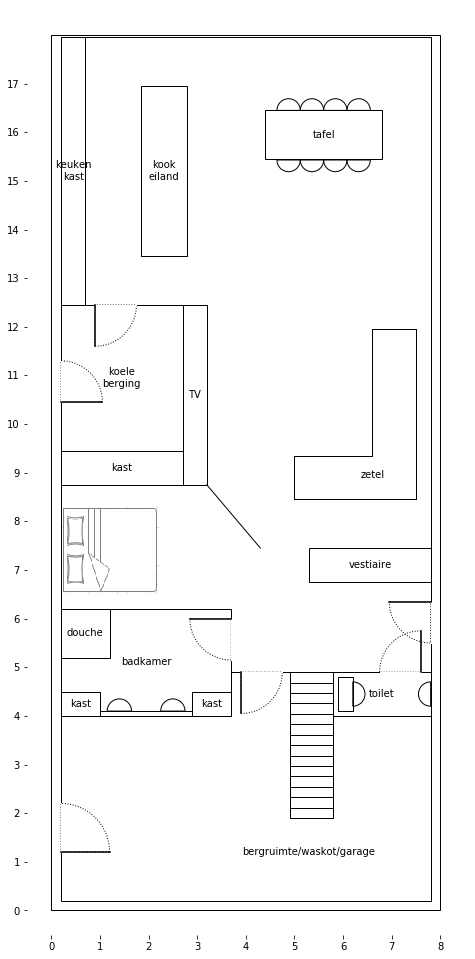

In [8]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle,Wedge
import numpy as np
import scipy.ndimage
import math

scale = 1
plt.figure(figsize=(scale*9,scale*17))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
def rectangle(x1,y1,x2,y2,text=None,alpha=1):
    #plt.plot([x1,x2],[y1,y2])
    #plt.plot([x1,x2],[y1,y2])
    #plt.plot([x1,x2],[y1,y2])
    ax.add_patch(Rectangle((x1,y1),x2-x1,y2-y1,fill=None,alpha=alpha))
    if text:
        ax.text(x=(x1+x2)/2,y=(y1+y2)/2,s=text,horizontalalignment="center",verticalalignment="center")
        
def text(x,y,text):
    ax.text(x=x,y=y,s=text,horizontalalignment="center",verticalalignment="center")
    
# house

def horizontalline(y,x1,x2):
    plt.plot([x1,x2],[y,y],c="black",lw=1)
def verticalline(x,y1,y2):
    plt.plot([x,x],[y1,y2],c="black",lw=1)
    
def line(x1,y1,x2,y2):
    plt.plot([x1,x2],[y1,y2],c="black",lw=1)

#outside walls
rectangle(0,0,8,18)

#inside walls
binnentop = 17.95
binnenbottom = 0.2
binnenleft = 0.2
binnenright = 7.8
rectangle(binnenleft,binnenbottom,binnenright,binnentop)

keukenkasttop = binnentop
keukenkastbottom = binnentop - 5.5
keukenkastleft = binnenleft
keukenkastright = binnenleft + 0.5
rectangle(keukenkastleft,keukenkastbottom,keukenkastright,keukenkasttop,"keuken\nkast")

kookeilandtop = binnentop - 1
kookeilandbottom = binnentop - 4.5
kookeilandleft = keukenkastright + 1.15
kookeilandright = kookeilandleft + 0.95
rectangle(kookeilandleft,kookeilandbottom,kookeilandright,kookeilandtop,"kook\neiland")

tafeltop = binnentop - 1.5
tafelbottom = tafeltop - 1
tafelright = binnenright - 1
tafelleft = tafelright - 2.4
rectangle(tafelleft,tafelbottom,tafelright,tafeltop,"tafel")

koelebergingtop = keukenkastbottom
koelebergingbottom = koelebergingtop - 3
koelebergingleft = binnenleft
koelebergingright = koelebergingleft + 2.5
rectangle(koelebergingleft,koelebergingbottom,koelebergingright,koelebergingtop,"koele\nberging")

haardmuurtjey = koelebergingtop
haardmuurtjeleft = koelebergingright
haardmuurtjeright = haardmuurtjeleft + 0.5
horizontalline(haardmuurtjey,haardmuurtjeleft,haardmuurtjeright)

zetelbottom = binnentop - 9.5
zetelkorttop = zetelbottom + 0.9
zetellangtop = zetelbottom + 3.50
zetelright = binnenright - 0.3
zetellangleft = zetelright - 0.9
zetelkortleft = zetelright - 2.5
verticalline(zetelkortleft,zetelbottom,zetelkorttop)
verticalline(zetellangleft,zetelkorttop,zetellangtop)
verticalline(zetelright,zetelbottom,zetellangtop)
horizontalline(zetelbottom,zetelkortleft,zetelright)
horizontalline(zetelkorttop,zetelkortleft,zetellangleft)
horizontalline(zetellangtop,zetellangleft,zetelright)

badkamerbottom = 4
badkamertop = badkamerbottom + 2.2
badkamerleft = binnenleft
badkamerright = badkamerleft + 3.5
rectangle(badkamerleft,badkamerbottom,badkamerright,badkamertop,"badkamer")

toiletbottom = badkamerbottom
toilettop = toiletbottom + 0.9
toiletright = binnenright
toiletleft = toiletright - 2
rectangle(toiletleft,toiletbottom,toiletright,toilettop,"toilet")

bureaukasttop = koelebergingbottom
bureaukastbottom = bureaukasttop - 0.7
bureaukastleft = binnenleft
bureaukastright = bureaukastleft + 2.5
rectangle(bureaukastleft,bureaukastbottom,bureaukastright,bureaukasttop,"kast")

vestiairetop = binnentop - 10.5
vestiairebottom = vestiairetop - 0.7
vestiaireright = binnenright
vestiaireleft = vestiaireright - 2.5
rectangle(vestiaireleft,vestiairebottom,vestiaireright,vestiairetop,"vestiaire")

bureautop = bureaukastbottom
bureaubottom = badkamertop
bureauleft = binnenleft
bureauright = badkamerright
#rectangle(bureauleft,bureaubottom,bureauright,bureautop,"bureau")


trapwidth = 0.9
traptop = toilettop
trapbottom = traptop - 3
trapright = toiletleft
trapleft = trapright - trapwidth
rectangle(trapleft,trapbottom,trapright,traptop)

n_treden = 15
for i in np.linspace(traptop,trapbottom,n_treden):
    rectangle(trapleft,trapbottom,trapright,i)

haardmuurtjey = bureaukastbottom
haardmuurtjeleft = bureaukastright
haardmuurtjeright = haardmuurtjeleft + 0.5
#horizontalline(haardmuurtjey,haardmuurtjeleft,haardmuurtjeright)

bergruimtetop = traptop
horizontalline(bergruimtetop,badkamerright,trapleft)
#verticalline(badkamerright,bergruimtetop,badkamerbottom)

text(binnenright-2.5,binnenbottom+1,"bergruimte/waskot/garage")
#text(binnenleft+3,vestiairebottom-2, "hal")
text(zetellangleft,zetelkorttop-0.4, "zetel")


def halfcircle(x,y,r,orientation):
    if orientation == "top":
        theta1 = 0
        theta2 = 180
    elif orientation == "left":
        theta1 = 90
        theta2 = 270
    elif orientation == "right":
        theta1 = 270
        theta2 = 90
    elif orientation == "bottom":
        theta1 = 180
        theta2 = 0
    ax.add_patch(Wedge((x,y),r,theta1,theta2,fill=False))

    
def image(left,bottom,right,top,name,rotation=0,flip=False,alpha=1):
    img = plt.imread(name)
    if flip:
        img = np.flip(img,1)
    for _i in range(0,rotation):
        img = np.rot90(img)
    plt.imshow(img, extent=(left, right, top, bottom),alpha=alpha)

bedleft = bureauleft
bedright = bedleft + 2
bedbottom = bureaubottom + 0.3
bedtop = bedbottom + 1.80
image(bedleft,bedbottom,bedright,bedtop,"bed.png",1,flip=True,alpha=0.5)
#image(zetelkortleft-0.5,zetelbottom,zetelright,zetellangtop+0.5,"sofa.jpg",0,flip=True,alpha=0.6)
nb_stoelen = 4
for x in np.linspace(tafelleft,tafelright,nb_stoelen+2)[1:-1]:
    r = (tafelright-tafelleft)/(nb_stoelen+1)/2
    halfcircle(x,tafeltop,r,"top")
    halfcircle(x,tafelbottom-0.02,r,"bottom")

def deur(x,y,degrees2,degrees1,deurwidth = 0.85):
    sin1 = math.sin(degrees1/180*math.pi)
    cos1 = math.cos(degrees1/180*math.pi)
    sin2 = math.sin(degrees2/180*math.pi)
    cos2 = math.cos(degrees2/180*math.pi)
    plt.plot([x,x+deurwidth*cos2],[y,y+deurwidth*sin2],c="white",lw=1)
    #plt.plot([x,x+deurwidth*cos2],[y,y+deurwidth*sin2],ls=":",c="k")
    plt.plot([x,x+deurwidth*cos1],[y,y+deurwidth*sin1],c="k")
    if degrees2 < degrees1:
        degrees1,degrees2 = degrees2,degrees1 
    ax.add_patch(Wedge((x,y),deurwidth,degrees1,degrees2,fill=False,ls=":"))

    
deur(keukenkastright+0.2,koelebergingtop,360,360-90)
deur(binnenright,vestiairebottom-0.4,270,270-90)
deur(binnenleft,koelebergingbottom+1,90,90-90)
deur(toiletright-0.2,toilettop,180,180-90)
deur(badkamerright,badkamertop-0.2,270,270-90)
deur(badkamerright+0.2,bergruimtetop,360,360-90)
deur(binnenleft,binnenbottom+1,90,90-90,deurwidth=1)
#deur(bureauright,bureaubottom+1,90,90+90)

rectangle(toiletleft+0.1,toiletbottom+0.1,toiletleft+0.4,toilettop-0.1)
halfcircle(toiletleft+0.4,toiletbottom + (toilettop-toiletbottom)/2,0.25,"right")
halfcircle(toiletright,toiletbottom + (toilettop-toiletbottom)/2,0.25,"left")
#line(haardmuurtjeright,vestiairebottom,bureauleft,bureautop)
#verticalline(haardmuurtjeright,bureaukastbottom,bureaukastbottom-0.5)
#horizontalline(bureautop,bureauleft,bureauleft-0.5)
#line(haardmuurtjeright,bureaukastbottom-0.5,bureauleft-0.5,bureautop)
#deur(bureauleft-0.5,bureautop,137,137-45)

haardleft=koelebergingright
haardright=haardleft + 0.5
haardtop = koelebergingtop
haardbottom = bureaukastbottom
rectangle(haardleft,haardbottom,haardright,haardtop,"TV")

line(haardright,haardbottom,vestiaireleft-1,vestiairetop)

rectangle(badkamerleft,badkamertop-1,badkamerleft+1,badkamertop,"douche")
rectangle(badkamerleft,badkamerbottom,badkamerleft + 0.8,badkamerbottom + 0.5,"kast")
rectangle(badkamerright-0.8,badkamerbottom,badkamerright,badkamerbottom + 0.5,"kast")
rectangle(badkamerleft + 0.8,badkamerbottom, badkamerright - 0.8, badkamerbottom + 0.1)
halfcircle(badkamerleft + 1.2,badkamerbottom+0.1,0.25,"top")
halfcircle(badkamerright - 1.2,badkamerbottom+0.1,0.25,"top")
    
#plt.xlim(-4,8+4)
#plt.yticks(range(-6,40))
#plt.ylim(-6,18+16)
plt.xlim(-0.5,8+0.5)
plt.yticks(range(0,18))
plt.ylim(-0.5,18+0.5)
plt.show()